# 1. Importar librerías

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# 2. Importar datos

In [2]:
df_manual = pd.read_csv('Datasets/seleccion_manual.csv')
df_anova = pd.read_csv('Datasets/seleccion_anova.csv')
df_total = pd.read_csv('Datasets/datos_preparados.csv')

In [3]:
X = df_total.drop(['target'], axis=1)
y = df_total.target

X_train, X_test, y_train, y_test = utils.split(X, y, test_size = 0.2)

X train shape:  (3520, 69)
y train shape:  (881, 69)
X test shape:  (3520,)
y test shape:  (881,)


## 3. Random Forest Classifier

In [4]:
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
              'max_leaf_nodes': [45, 50, 55, 65, 70, 75, 80, 85, 90],
              'min_samples_leaf': [3, 5, 7, 9, 11, 13, 15, 17, 19],
              'max_features': [0.5, 0.6, 0.7, 0.8, 0.9],
              'n_estimators': [800, 1000, 1200]}

### Con todas las características

In [ ]:
ranfor = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

rand_s = RandomizedSearchCV(estimator=ranfor,
                            param_distributions=parameters,
                            n_iter=10,
                            scoring='f1',
                            cv=5,
                            verbose=False)
rand_s.fit(X_train, y_train)

In [182]:
rand_s.best_estimator_.score(X_train, y_train)

0.9678977272727273

------------------------------ TRAIN ------------------------------


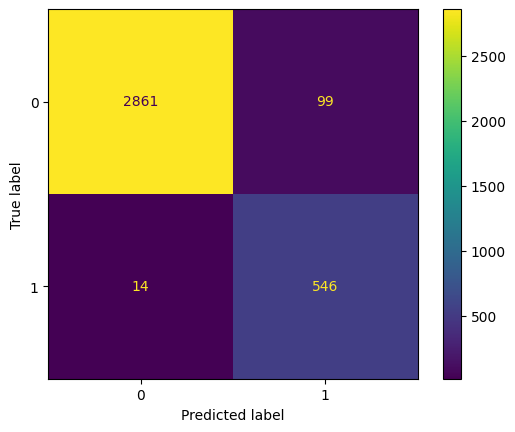

Precision: 0.8465116279069768
Recall: 0.975
Especificidad: 0.966554054054054
F1 score: 0.9062240663900415
Train score:  0.9678977272727273


In [183]:
precision, recall, especificidad, f1_score = utils.conf_matrix(rand_s.best_estimator_, X_train, y_train, 'TRAIN')

# 4. Xtreme Gradiant Boosting

In [ ]:
# Definición de cuadricula de hiperparametros
parameters_gb =  {'eta': [0.3,0.4,0.5,0.6],
              'colsample_bytree': [0.8,0.9,1],
              'max_depth': [4,6,8,10,12],
              'n_estimators': [800,1000,1200],
              'learning_rate':[0.1,0.2,0.3]
              }

## Con todas las características

In [ ]:
XGBmodel = XGBClassifier(random_state = 42, classmethod='')

rand_s_xgb = RandomizedSearchCV(estimator = XGBmodel,
                            param_distributions = parameters,
                            n_iter = 50,
                            scoring = 'f1',
                            cv = 5,
                            verbose = False,
                            n_jobs = -1)
rand_s_xgb.fit(X_train, y_train)

0.8636363636363636

In [10]:
rand_s_xgb.best_estimator_.score(X_train, y_train)

0.8637395912187736

In [ ]:
precision_xgb, recall_xgb, especificidad_xgb, f1_score_xgb = utils.conf_matrix(rand_s_xgb.best_estimator_, X_train, y_train, 'TRAIN')

# 5. Suport Vector Machine 

In [16]:
param_svm = {
    'gamma': [0.01, 0.05, 0.1, 1]
    }

In [17]:
svm = SVC(random_state = 42, class_weight = 'balanced')

rand_s_svm = RandomizedSearchCV(estimator = svm,
                            param_distributions = param_svm,
                            n_iter = 2,
                            scoring = 'f1',
                            cv = 5,
                            verbose = False,
                            n_jobs = -1)
rand_s_svm.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=SVC(class_weight='balanced', random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'gamma': [0.01, 0.05, 0.1, 1]},
                   scoring='f1', verbose=False)

In [18]:
rand_s_svm.best_estimator_.score(X_train, y_train)

1.0

In [31]:
svm = SVC(class_weight='balanced',
          gamma=0.01,
          random_state=42,
          max_iter=-1
        )
svm.fit(X_train, y_train)

SVC(class_weight='balanced', gamma=0.01, random_state=42)

In [32]:
svm.score(X_train, y_train)

1.0

------------------------------ TRAIN ------------------------------


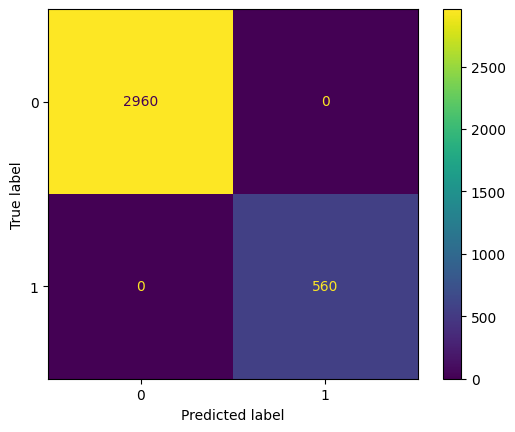

Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1 score: 1.0
Train score:  1.0


In [33]:
precision, recall, especificidad, f1_score = utils.conf_matrix(svm, X_train, y_train, 'TRAIN')

------------------------------ TEST ------------------------------


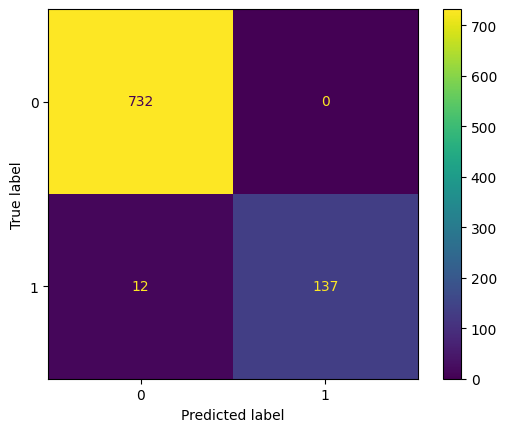

Precision: 1.0
Recall: 0.9194630872483222
Especificidad: 1.0
F1 score: 0.958041958041958
Train score:  0.9863791146424518


In [34]:
precision, recall, especificidad, f1_score = utils.conf_matrix(svm, X_test, y_test, 'TEST')